# Compare Policy Interventions for Baseline Scenario (Flood = "100yr"-flood)

This section analyses the combination of different policy interventions fro the baseline scenario where the flood "110yr"-flood hits.
The combination of policies are the following:
- no subsidies, no information campaign
- subsidies, no information campaign
- no subsidies, information campaign
- subsidies, information campaign

In [1]:
# import of libraries and functions

from model import AdaptationModel
from mesa import batch_run
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

number_of_households = 50 # numbers of houshold agents in model
number_of_steps = 20 # number of time steps in model, each representing 1/4 year
time_of_flooding = 20 # time step at which flooding occurs
number_of_iterations = 5 # number of times the model is run per parameter combination selcted from the below prensented parameter space

# parameter space
subsidie_level = [0, 5000] # subsidy level in USD
information_bias = [0, 0.1] # Risk perception bias of government 

In [3]:
# Setup and run the model multiple times for different parameters

# Define fixed parameters
params = {
    "number_of_households": number_of_households,
    "flood_map_choice": "100yr", 
    "network": "watts_strogatz", 
    "probability_of_network_connection": 0.4,
    "number_of_edges": 3,
    "number_of_nearest_neighbours": 5,
    "time_of_flooding": time_of_flooding,
    "subsidie_level": subsidie_level,
    "information_bias": information_bias
}

# Creat the batch runner
results = batch_run(
    AdaptationModel,
    parameters=params,
    iterations=number_of_iterations, # number of model runs for each combination of parameters
    max_steps=number_of_steps, # maximum number of steps for each model run
    number_processes=1, # number of processes to use
    data_collection_period = 1,
)

  0%|          | 0/20 [00:00<?, ?it/s]

c:\Users\jonas.klimt\Documents\Master\Q2(2)\ABM\base_model_mesa\sen1211\Lib\site-packages\mesa\time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


In [4]:
results_df =pd.DataFrame(results)
results_df


,RunId,iteration,Step,number_of_households,flood_map_choice,network,probability_of_network_connection,number_of_edges,number_of_nearest_neighbours,time_of_flooding,...,RiskPerception,PriorRiskPerception,FloodDepthActual,FloodDamageActual,IsAdapted,AdaptedAt,FriendsCount,Location,Savings,IncomeCategory
0,0,0,0,50,100yr,watts_strogatz,0.4,3,5,20,...,1.000000,NaN,0.000000,0.000000,False,NaN,3,POINT (221556.6326276135 3346883.685396936),34361.000000,middle
1,0,0,0,50,100yr,watts_strogatz,0.4,3,5,20,...,0.134337,NaN,0.000000,0.000000,False,NaN,4,POINT (246575.34816485428 3306419.7857831083),12584.000000,low
2,0,0,0,50,100yr,watts_strogatz,0.4,3,5,20,...,0.494166,NaN,0.000000,0.000000,False,NaN,3,POINT (301056.83785871876 3299934.34044629),58915.000000,middle
3,0,0,0,50,100yr,watts_strogatz,0.4,3,5,20,...,0.896623,NaN,0.000000,0.000000,False,NaN,5,POINT (234098.05502774773 3315234.6207165876),21546.000000,middle
4,0,0,0,50,100yr,watts_strogatz,0.4,3,5,20,...,0.037642,NaN,0.000000,0.000000,False,NaN,3,POINT (238839.94443515985 3304205.495014505),55409.000000,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,19,4,20,50,100yr,watts_strogatz,0.4,3,5,20,...,0.866667,0.866667,0.421824,0.000000,True,4.0,4,POINT (260946.55100347253 3308806.692751238),4099.865452,high
20996,19,4,20,50,100yr,watts_strogatz,0.4,3,5,20,...,0.866667,0.866667,0.448122,50815.019129,False,NaN,2,POINT (286796.51781621104 3266852.10078611),92521.608545,high
20997,19,4,20,50,100yr,watts_strogatz,0.4,3,5,20,...,0.866667,0.866667,1.266663,68957.291977,False,NaN,5,POINT (237869.92225941987 3346425.674957111),4850.117111,low
20998,19,4,20,50,100yr,watts_strogatz,0.4,3,5,20,...,0.866667,0.866667,0.000000,0.000000,False,NaN,4,POINT (283950.5945119978 3311436.223767761),109967.791958,high


In [5]:
selected_columns = results_df[["Step", "AgentID", 'Total_adapted_households', 'GovernmentSpendings', 'RiskPerception', 'FloodDamageActual','subsidie_level', 'information_bias', 'FloodDamageActual']]

# Group by "Step", "AgentID", "subsidie_level", and "information_bias" and calculate the mean
step_agent_mean = selected_columns.groupby(["Step", "AgentID", 'subsidie_level', 'information_bias']).mean()

# Reset the index so "Step", "AgentID", "subsidie_level", and "information_bias" become regular columns
step_agent_mean = step_agent_mean.reset_index()

# Group by "Step", "subsidie_level", and "information_bias" and calculate the mean
step_mean = step_agent_mean.groupby(["Step", 'subsidie_level', 'information_bias']).mean()

# Delete the "AgentID" column
step_mean = step_mean.drop(columns=["AgentID"])

# Display the result
step_mean

Total_adapted_households  \
Step subsidie_level information_bias                             
0    0              0.0                                    0.0   
                    0.1                                    0.0   
     5000           0.0                                    0.0   
                    0.1                                    0.0   
1    0              0.0                                    5.2   
...                                                        ...   
19   5000           0.1                                    9.4   
20   0              0.0                                    8.8   
                    0.1                                    8.6   
     5000           0.0                                    8.0   
                    0.1                                    9.4   

                                      GovernmentSpendings  RiskPerception  \
Step subsidie_level information_bias                                        
0    0              0.0                               0.0        0.501738   
                    0.1                            2000.0        0.497723   
     5000           0.0                               0.0        0.492657   
                    0.1                            2000.0        0.490424   
1    0              0.0                               0.0        0.744118   
...                                                   ...             ...   
19   5000           0.1                           87000.0        0.866667   
20   0              0.0                               0.0        0.833333   
                    0.1                           42000.0        0.866667   
     5000           0.0                           40000.0        0.833333   
                    0.1                           89000.0        0.866667   

                                      FloodDamageActual  FloodDamageActual  
Step subsidie_level information_bias                                        
0    0              0.0                        0.000000           0.000000  
                    0.1                        0.000000           0.000000  
     5000           0.0                        0.000000           0.000000  
                    0.1                        0.000000           0.000000  
1    0              0.0                        0.000000           0.000000  
...                                                 ...                ...  
19   5000           0.1                        0.000000           0.000000  
20   0              0.0                    19704.318572       19704.318572  
                    0.1                    21388.668904       21388.668904  
     5000           0.0                    22334.168437       22334.168437  
                    0.1                    20508.317092       20508.317092  

[84 rows x 5 columns]

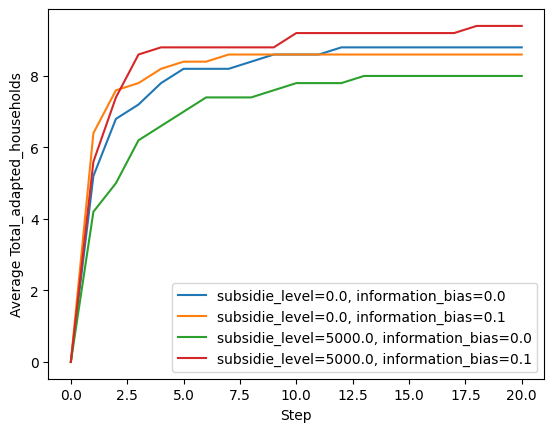

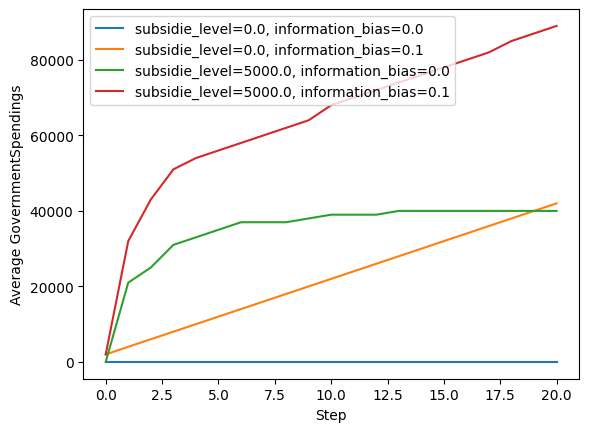

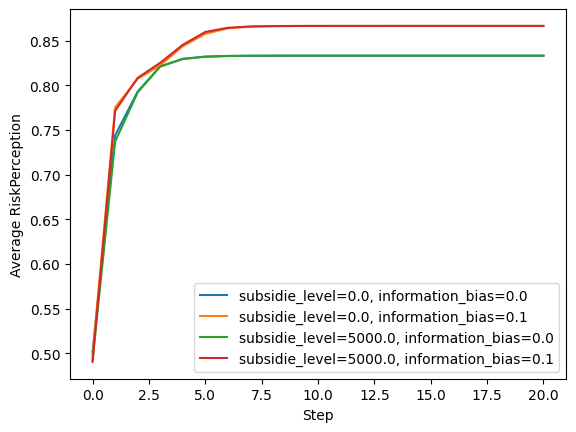

In [6]:

# Get the unique combinations of subsidie_level and information_bias
combinations = step_mean.reset_index()[['subsidie_level', 'information_bias']].drop_duplicates().values

def plot_variable(variable):
    # Create a new figure
    plt.figure()

    # Plot a line for each combination
    for subsidie_level, information_bias in combinations:
        subset = step_mean.xs((subsidie_level, information_bias), level=('subsidie_level', 'information_bias'))
        plt.plot(subset.index, subset[variable], label=f'subsidie_level={subsidie_level}, information_bias={information_bias}')

    # Add a legend
    plt.legend()

    # Add labels
    plt.xlabel('Step')
    plt.ylabel(f'Average {variable}')

    # Show the plot
    plt.show()

# Plot 'Total_adapted_households'
plot_variable('Total_adapted_households')

# Plot 'GovernmentSpendings'
plot_variable('GovernmentSpendings')

# Plot 'RiskPerception'
plot_variable('RiskPerception')


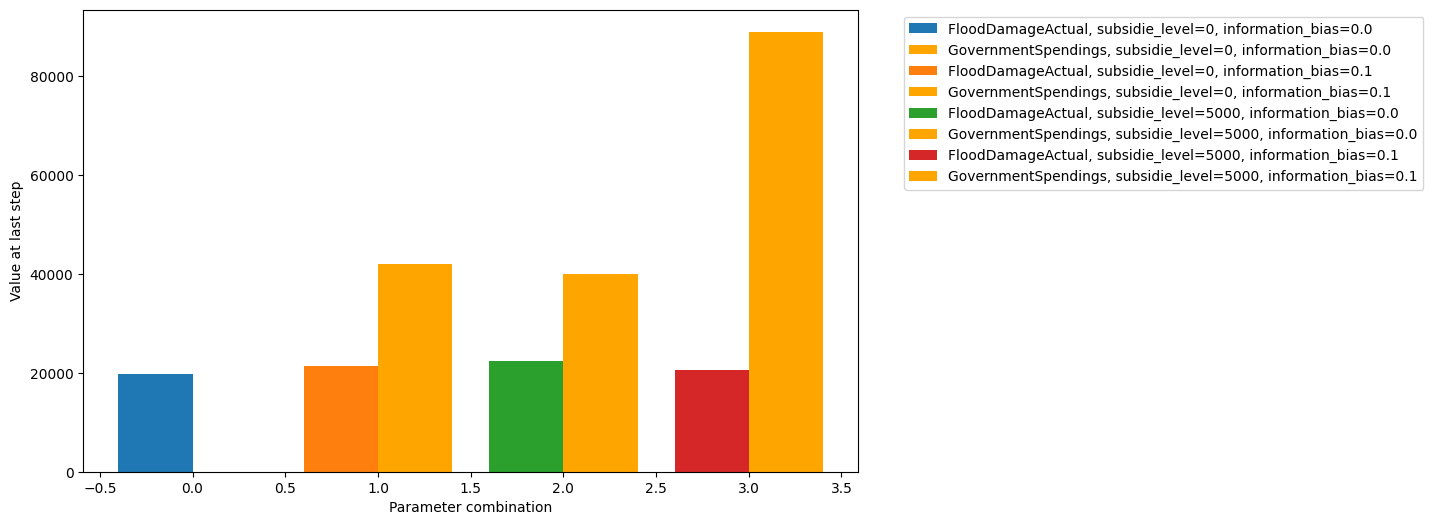

In [7]:
# Select the last step for each combination
last_step = step_mean.groupby(['subsidie_level', 'information_bias']).last()

# Create a new figure
plt.figure(figsize=(10, 6))

# Create two bars for each combination
for i, ((subsidie_level, information_bias), row) in enumerate(last_step.iterrows()):
    plt.bar(i - 0.2, row['FloodDamageActual'], width=0.4, label=f'FloodDamageActual, subsidie_level={subsidie_level}, information_bias={information_bias}')
    plt.bar(i + 0.2, row['GovernmentSpendings'], width=0.4, color='orange', label=f'GovernmentSpendings, subsidie_level={subsidie_level}, information_bias={information_bias}')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels
plt.xlabel('Parameter combination')
plt.ylabel('Value at last step')

# Show the plot
plt.show()
